# INTRODUCTION
1. [Explore Data](#exp)
2. [Linear Regression and validation](#lin)
3. [Linear Regression with PCA and validation](#pca)        
4. [Residue and Homoscedasticity](#res)
5. [Analysis on models](#ana)
6. [Conclusion](#con)

This notebook does not focus on Data cleaning and Exploration but the code of models. The cleaning part is done in clean-Melbourne_housing_FULL-cleaned.csv.ipynb file.

# <a id="exp">1. Explore Data </a>

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# show plot intermediately under the calling cell
%matplotlib inline

In [2]:
# read CSV files
df = pd.read_csv('Melbourne_housing_FULL-cleaned.csv')

#set pandas settings
pd.set_option('display.max_columns', None)

# disable some warnings
import warnings
warnings.simplefilter(action = "ignore")

## 1.1. Explore numberic data

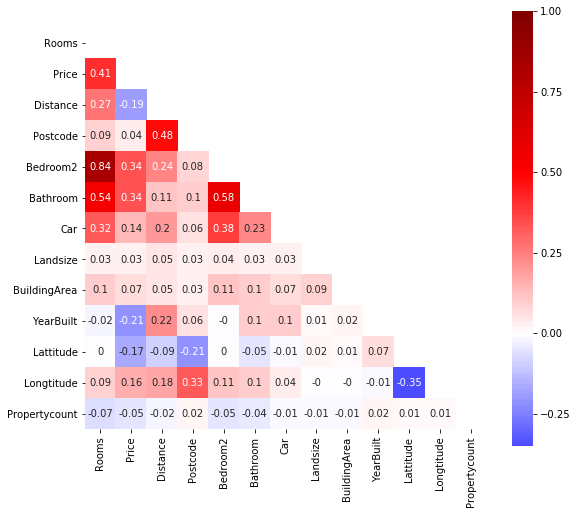

In [3]:
plt.figure(figsize=(9,8))
corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap="seismic", square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0, mask=mask, annot= True)
plt.show()

/////////////_briefly describe the graph above_

## 1.2. Explore Categorical data

In [4]:
# get brief describe of object-type columns to check whether 
# one-hot-encoding is needed or not.
df.describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34837,34837,34837,34837,34837,34837,34835,34835
unique,350,33989,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23964,19736,3358,1116,3672,11827


//////////// _table above shows some properties of categorical columns. Describe your insights_

## 1.3. Feature engineering
///// don't forget to split data first

In [ ]:
# prepare the train and test data.
# x_train, x_test, y_train, y_test = train_test_split(xdf, ys, test_size=0.2,
#                                                     random_state=25)

### 1.3.1. Transform categorical data

///////// *pick a reasonable method to transform categorical data into numeric*

### 1.3.2 MinMaxScaler
////// _google "sklearn minmaxscaler" and figure out how to use_

## 1.4. Feature selection

We choose these features to predict the __price__ of the house because:

///////// _continue using this format_
- __picked feature__ : reason...

# <a id="lin">2. Linear regression and validation</a>

## 2.1. Linear regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Train the model
regr1 = linear_model.LinearRegression()
regr1.fit(x_train, y_train)

# print result
print('Intercept:',regr1.intercept_)
print('Coefficients of predictors:')
pd.DataFrame([regr1.coef_],columns=xdf.columns)

Intercept: -5.34955340664894e+17
Coefficients of predictors:


,Rooms,Distance,Bedroom2,YearBuilt,h,t,u,PI,PN,S,SA,SN,SP,SS,VB,W,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,1.576256e+06,-1.440609e+06,309451.481577,-221406.208116,4.864146e+17,4.864146e+17,4.864146e+17,4.854071e+16,4.854071e+16,4.854071e+16,4.854071e+16,4.854071e+16,4.854071e+16,4.854071e+16,4.854071e+16,4.854071e+16,228800.0,464664.0,7040.0,348712.0,356416.0,394976.0,-37568.0,143244.0


## 2.2. Validation

### 2.2.1. _Hold-out_

In [15]:
from sklearn.metrics import mean_squared_error

# predict the Price from test sample and get Root Mean Squared Error.
y_pred1 = regr1.predict(x_test)
print("Root mean squared error: ",
      mean_squared_error(y_test, y_pred1)**0.5)

Root mean squared error:  423270.1284498522


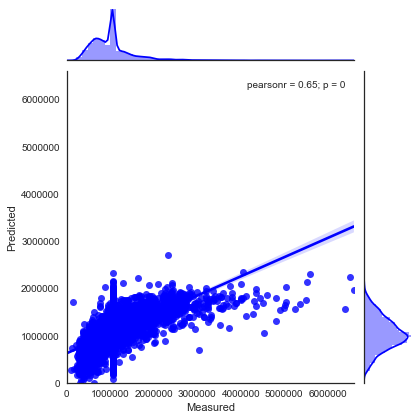

In [16]:
# cvdf = Cross Validation DataFrame
cvdf = pd.DataFrame({'Measured':y_test, 
                     'Predicted':y_pred1})
sns.jointplot("Measured", "Predicted", data=cvdf, kind="reg", color="b",
              xlim=(0, max(y_pred1.max(),y_test.max())),
              ylim=(0, max(y_pred1.max(),y_test.max())))
plt.show()

### 2.2.2. _cross validation_

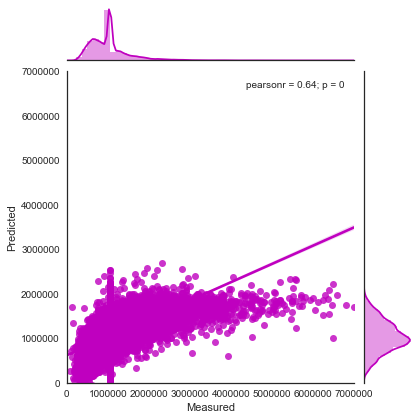

In [17]:
from sklearn.model_selection import cross_val_predict

regr2 = linear_model.LinearRegression()
# regr2.fit(xdf, ys)
measured2 = ys
predicted2 = cross_val_predict(regr2, xdf, ys, cv=10)

# cvdf = Cross Validation DataFrame
cvdf2 = pd.DataFrame({'Measured':ys, 
                     'Predicted':predicted2})
sns.jointplot("Measured", "Predicted", data=cvdf2, kind="reg", color="m", 
              xlim=(0, max(ys.max(), predicted2.max())),
              ylim=(0, max(ys.max(), predicted2.max())))
plt.show()

The linear regression line made by Measured and Predicted is way below the 45-degree line (indicates that Measure = Predicted), so the model tends to predict lower value than the real measured data.

In [18]:
# y_pred2 = regr2.predict(x_test)
print("Root mean squared error: ", 
      mean_squared_error(measured2, predicted2)**0.5)

Root mean squared error:  430774.6681988688


# <a id="pca">3. Linear Regression with PCA and validation </a>

## 3.1. PCA

The graph belows show explained variances from PCA using n features

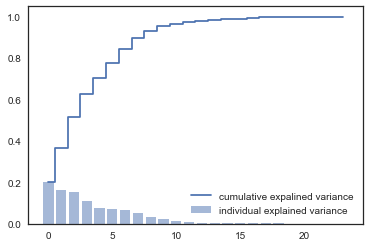

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(xdf.columns))
# put data (predictor only) to pca and create pcadf
pcadf = pd.DataFrame(pca.fit_transform(xdf))
ratio = pca.explained_variance_ratio_

tot = sum(ratio)
var_exp = [(i/tot) for i in ratio]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(0,len(xdf.columns)), var_exp, alpha=0.5, align='center',
        label = 'individual explained variance')
plt.step(range(0,len(xdf.columns)), cum_var_exp, where='mid',
        label = 'cumulative expalined variance')
plt.ylabel = 'Explained variance ratio'
plt.xlabel = 'Pricipal components'
plt.legend(loc='best')
plt.show()

In [20]:
# Cumulative explained variance:
pd.DataFrame([cum_var_exp], columns=["dim {}".format(i)
                    for i in range(1, len(xdf.columns)+1)])

,dim 1,dim 2,dim 3,dim 4,dim 5,dim 6,dim 7,dim 8,dim 9,dim 10,dim 11,dim 12,dim 13,dim 14,dim 15,dim 16,dim 17,dim 18,dim 19,dim 20,dim 21,dim 22,dim 23,dim 24
0,0.199872,0.363755,0.515696,0.627913,0.705595,0.778058,0.845071,0.897558,0.930782,0.95397,0.965634,0.972514,0.978479,0.98424,0.988017,0.99125,0.994099,0.996878,0.998723,0.999396,0.999996,1.0,1.0,1.0


//////////// _the code below has "n" as dimensions to reduce to, decide that number so the total explation ratio > 0.95_

In [ ]:
# create a PCA to reduce dimension to n
n =  #???????
pca = PCA(n_components=n)
# put data (predictor only) to pca and create pcadf
pcadf = pd.DataFrame(pca.fit_transform(xdf))

# prepare the train and test data.
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(
                        pcadf, ys, test_size=0.2, random_state=50)
# Train the model
regr3=linear_model.LinearRegression()
regr3.fit(x_train_pca, y_train_pca)

# print result
print('Intercept:',regr3.intercept_.round(4))
print('Coefficients of predictors:')
codf = pd.DataFrame([regr3.coef_.round(4)],columns=["dim {}".format(i)
                    for i in range(1, n+1)] )
codf

## 3.2. Validation
/////// _do hold-out and cross validation same as above_

### 3.2.1. _Hold-out_

### 3.2.2. Cross validation

# <a id="tun">5. Analyze the models - Conclusion</a>

////////// _final conclusion_